<a href="https://colab.research.google.com/github/anacasicande/Modelamiento/blob/main/Parcial2malo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pendiente inicial óptima (y'(0)): 2.043778491574308


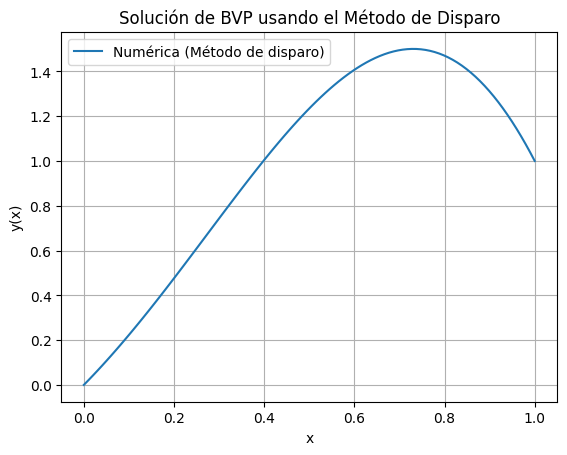

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

# Definir el sistema de ecuaciones diferenciales
def sistema_ode(x, y):
    y1, y2 = y  # y1 = y, y2 = y'
    dy1dx = y2  # Primera ecuación: y' = y2
    dy2dx = 2*y2 - 8*y1  # Segunda ecuación: y'' = -2y' + 8y
    return [dy1dx, dy2dx]

# Función de disparo
def disparo(u2_0):
    # Condiciones iniciales para el IVP
    condiciones_iniciales = [0, u2_0]  # y(0) = 0, y'(0) = u2_0 (pendiente inicial)
    sol = solve_ivp(sistema_ode, [0, 1], condiciones_iniciales, t_eval=np.linspace(0, 1, 200))

    # Extraer el valor final de y1 en x=1, que debería estar cerca de 1
    final_y1 = sol.y[0, -1]
    return final_y1 - 1  # Queremos que esto sea 0 en x=1

# Encontrar el valor óptimo de y'(0) usando root_scalar
resultado = root_scalar(disparo, bracket=[0, 10], method='brentq')
print("Pendiente inicial óptima (y'(0)):", resultado.root)

# Resolver el sistema ODE usando la pendiente inicial óptima encontrada
condiciones_iniciales = [0, resultado.root]  # y(0) = 0, y'(0) = valor óptimo
solucion = solve_ivp(sistema_ode, [0, 1], condiciones_iniciales, t_eval=np.linspace(0, 1, 100))

# Dibujar la solución numérica
plt.plot(solucion.t, solucion.y[0], label='Numérica (Método de disparo)')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.title('Solución de BVP usando el Método de Disparo')
plt.grid(True)
plt.show()